# Advanced Data Analysis Exercise


**"... This dataset contains average counts of bicycle traffic by hour of the day and day of the week. Data is collected from bicycle counters across approximately 16 active transport sites. As more sites come on line in the future these will be added to the dataset..."** - from [Queensland Government Open Data Portal](https://www.data.qld.gov.au/dataset/average-bicycle-counts-by-day-and-hour/resource/0234d8d0-b1bf-485f-877a-cc7524db4d5a)

## Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('averagebicyclecounts-bydayandhourfromjanuary2020-tojune2020.csv')
data

,SITE_ID,DESCRIPTION,MONTHS,YEARS,HOURS,SATURDAY,SUNDAY,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY
0,9,"Gateway Motorway South, Murarrie",January,2020,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,9,"Gateway Motorway South, Murarrie",January,2020,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9,"Gateway Motorway South, Murarrie",January,2020,2,0.0,0.0,2.0,1.0,1.0,1.0,1.0
3,9,"Gateway Motorway South, Murarrie",January,2020,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,"Gateway Motorway South, Murarrie",January,2020,4,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2318,6086,Deagon Wetland (CMU-6086),June,2020,19,1.0,1.0,7.0,7.0,4.0,5.0,5.0
2319,6086,Deagon Wetland (CMU-6086),June,2020,20,1.0,0.0,1.0,9.0,7.0,3.0,1.0
2320,6086,Deagon Wetland (CMU-6086),June,2020,21,0.0,0.0,0.0,3.0,2.0,1.0,0.0
2321,6086,Deagon Wetland (CMU-6086),June,2020,22,0.0,0.0,0.0,0.0,3.0,0.0,0.0


## Find the busiest day with the most bicycles on the road

### Clean the dataset
- Change the table from the wide format to the tall format
- Drop and Rename the table columns

In [4]:
# convert from wide to tall table format
tall_df = data.melt(id_vars=["SITE_ID", "DESCRIPTION", "YEARS", "MONTHS", "HOURS"], 
                    var_name="Days",
                    value_name="BicycleCount")

# convert "Days" column from string to a categorical variable
tall_df["Days"] = pd.Categorical(tall_df["Days"], 
                                categories=["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"], 
                                ordered=True)
tall_df.head()

,SITE_ID,DESCRIPTION,YEARS,MONTHS,HOURS,Days,BicycleCount
0,9,"Gateway Motorway South, Murarrie",2020,January,0,SATURDAY,1.0
1,9,"Gateway Motorway South, Murarrie",2020,January,1,SATURDAY,1.0
2,9,"Gateway Motorway South, Murarrie",2020,January,2,SATURDAY,0.0
3,9,"Gateway Motorway South, Murarrie",2020,January,3,SATURDAY,0.0
4,9,"Gateway Motorway South, Murarrie",2020,January,4,SATURDAY,0.0


### Examine the average bicycle count on different days of the week

In [5]:
daily_bicycle_count = tall_df \
    .groupby(["Days"])["BicycleCount"] \
    .mean()
daily_bicycle_count

Days
MONDAY       22.792049
TUESDAY      24.388014
WEDNESDAY    23.070215
THURSDAY     21.929659
FRIDAY       21.664014
SATURDAY     23.699046
SUNDAY       23.947596
Name: BicycleCount, dtype: float64

In [6]:
average_bicycle_count = daily_bicycle_count.mean()
print(f"On average, there are {average_bicycle_count:.2f} bicycles daily on the road across all the sites.")

busiest_day = daily_bicycle_count.idxmax()
print(f"The busiest day is {busiest_day} (average {daily_bicycle_count[busiest_day]:.2f} bicycles)")

On average, there are 23.07 bicycles daily on the road across all the sites.
The busiest day is TUESDAY (average 24.39 bicycles)


Text(0.5, 1.0, 'Daily Total Bicycle Count')

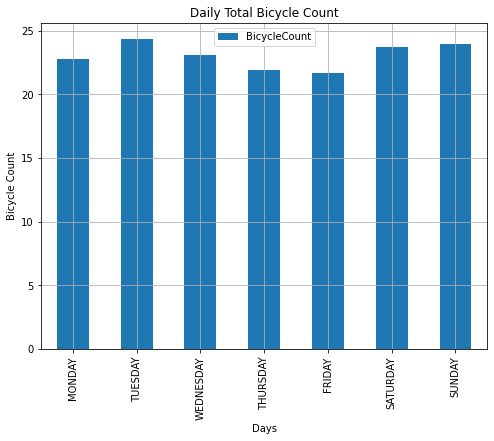

In [8]:
daily_bicycle_count \
    .reset_index() \
    .plot("Days", "BicycleCount", 
          kind="bar", 
          style=".-",
          figsize=(8,6))
plt.grid()
plt.xlabel("Days")
plt.ylabel("Bicycle Count")
plt.title("Daily Total Bicycle Count")

**Observations**:
- Everyday, there are 23.07 bicycles on the road across all the sites in Queensland.
- Queensland's people tends to ride bicycle more often during weekends.
- They also like to ride their bicycles on Tuesday, with 1.3 more bicycles than the daily average.


## Examine the average daily bicycle count per site in Queensland

In [9]:
# Group the data by the site and days
# Check the average bicycle count by site
avg_bicycle_count_per_site = tall_df \
    .groupby(["DESCRIPTION", "Days"])["BicycleCount"] \
    .mean() \
    .reset_index()

avg_bicycle_count_per_site

,DESCRIPTION,Days,BicycleCount
0,"ANZAC Park, Toowong",MONDAY,51.989130
1,"ANZAC Park, Toowong",TUESDAY,55.595960
2,"ANZAC Park, Toowong",WEDNESDAY,46.333333
3,"ANZAC Park, Toowong",THURSDAY,49.479167
4,"ANZAC Park, Toowong",FRIDAY,49.557692
...,...,...,...
128,Veloway1,WEDNESDAY,46.798611
129,Veloway1,THURSDAY,44.652778
130,Veloway1,FRIDAY,42.729167
131,Veloway1,SATURDAY,31.256944


## Find the top 10 busiest site with the highest daily average of bicycle count

In [10]:
# Find the top 10 site with the most daily average of bicycle count
# Replace the "__" with a proper variable name

top_10_sites = avg_bicycle_count_per_site \
    .groupby("DESCRIPTION")["BicycleCount"] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10) \
    .reset_index()
    
top_10_sites

,DESCRIPTION,BicycleCount
0,"Park Road, Woolloongabba",74.547532
1,"ANZAC Park, Toowong",51.638917
2,"Normanby West, Brisbane",51.589286
3,Veloway1,42.297619
4,Ted Smout Bridge,33.560516
5,"Centenary Freeway Bikeway, Indooroopilly",33.130952
6,"Toowong Overpass, Brisbane",30.360017
7,Boondall (CMU-6085),22.847222
8,"Mowbray Park, East Brisbane",21.024802
9,PA Hospital Cycle path near O'Keefe Street,17.969691


Text(0.5, 1.0, 'Top 10 Sites')

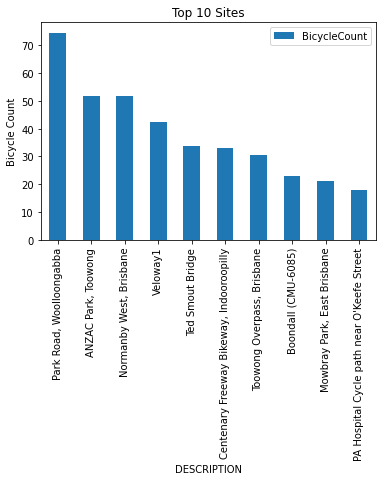

In [11]:
top_10_sites.plot("DESCRIPTION", "BicycleCount", kind="bar")
plt.ylabel("Bicycle Count")
plt.title("Top 10 Sites")

**Observations**
- Park Road, Woolloongabba has the highest daily average of bicycle on the road. The number of bicycles is three times higher than the daily average across all the sites

### Food for thoughts
Assume that you are a government officer responsible for the road planning, 
1. Which roads should be constantly monitored to ensure the safety of the cyclists? Or even invested to ensure it can handle a large amount of cyclists?

1. Is the results in this analysis sufficient for used in road planning? What can we do better to inform the public and government? 